## Task 1: Describe Linear Regression in English
Given a dataset of $n$ values $(x_i, y_i)$ for $1 \leq i \leq n$, describe the process to compute values $\alpha$ and $\beta$ such that $$\sum_{i = 1}^n (y_i - \alpha x_i - \beta)^2$$ is minimal. This will yield a (linear) model $y = \alpha x + \beta$ adhering to the least-squares condition.
> Marking information: Up to 30 points: 15 points for an algorithm that can be followed, and 15 points for the correctness of this algorithm against the specification "linear regression." 


Solution: 
1. Calculate the mean of the dataset, the average position. The regression line will pass through this point. 
  - To calculate the mean x value, sum over all x values and divide by n. 
  - Repeat this process with the y values. This will give you the mean position (xbar, ybar).

2. Calculate the distance of each position in the dataset from the mean:
  - Distance (a, b) = (xi - xbar, yi - ybar) for each (xi, yi) in the dataset.

3. Use this to find the coefficient (alpha): 
  - Take the sum of a * b for each distance calculated. This gives you the numerator of the coefficient.
  - Take the sum of a^2 for each distance calculated. This gives you the denominator of the coefficient.
  - alpha can then be calculated by dividing the numerator by the denominator.

4. To find the intercept (beta), input alpha and the mean position (xbar,ybar) into the formula: 
  - beta = ybar - alpha * xbar

5. The formula for the regression line is therefore y = alpha * x + beta.


## Task 2: Create and Complete a Simple Example
Come up with a dataset of just 3 values ($\{(x_1, y_1), (x_2, y_2), (x_3, y_3)\}$). Then exercise the algorithm of Task 1 on this small dataset. You might prefer to do this using pen and paper. For your submission, provide at least the dataset that you have chosen and the resulting values of $\alpha$ and $\beta$.
> Marking information: Up to 20 points: 5 points for sample values, and up to 15 points for suitable values of $\alpha$ and $\beta$.



Solution:

dataset = [[4,5],[8,4],[6,9]]

Working from manual calculations using the algorithm from Task 1:

1. xbar = 6 ;
ybar = 6

2. distance 1 = (-2, -1) ;
distance 2 = (2, -2) ;
distance 3 = (0, 3)

3. alpha numerator = -2 ;
alpha denominator = 8 ;
alpha = -1/4 = -0.25

4. beta = 15/2 = 7.5

Therefore, alpha = -0.25 and beta = 7.5 for the dataset above.

## Task 3: Implement the Algorithm of Task 1 in Python
Starting from your description of the steps to undertake, transfer English and Maths to Python. Note that you are expected to fully implement the mathematical operations instead of using a library function such as `scikit` or `statsmodels`.
> Marking information: Up to 40 points: 30 points for a correctly working Python implementation, and 10 points for comments and overall readability.



In [2]:
""" 1. Calculate the mean of the dataset, the average position. The regression line will pass through this point. 
      - To calculate the mean x value, sum over all x values and divide by n. 
      - Repeat this process with the y values. This will give you the mean position (xbar, ybar).

    2. Calculate the distance of each position in the dataset from the mean:
      - Distance (a, b) = (xi - xbar, yi - ybar) for each (xi, yi) in the dataset.
      
    3. Use this to find the coefficient (alpha): 
      - Take the sum of a * b for each distance calculated. This gives you the numerator of the coefficient.
      - Take the sum of a^2 for each distance calculated. This gives you the denominator of the coefficient.
      - alpha can then be calculated by dividing the numerator by the denominator.

    4. To find the intercept (beta), input alpha and the mean position (xbar,ybar) into the formula: 
      - beta = ybar - alpha * xbar
      
    5. The formula for the regression line is therefore y = alpha * x + beta.
    
"""
# Input = a list of points in 2 dimensions
# Required Output = two values: alpha and beta such that y = alpha*x + beta is the equation for the regression line. 

# for generating test input:
import numpy as np 

def generate_2D_test_points(number_of_points = 10, min_val = 0, max_val = 10):
    test_input = [list(np.random.randint(min_val, max_val, 2)) for i in range(number_of_points)]
    return test_input

def check_input(points):
    # Ensure that at least 2 points have been provided and that all points are 2D
    if len(points)<2:
        return "Not enough data provided, please provide at least 2 points"
    
    for point in points:
            
        if type(point)!=list:
            return "Please provide points as lists"
               
        elif len(point)!=2:
            return "Please provide 2D points"

def calculate_mean(x,y):
    xbar = sum(x)/len(x)
    ybar = sum(y)/len(y)
        
    return (xbar, ybar) 

def calculate_covariance(x, y, xbar, ybar):
    covariance = 0
    for i in range(len(x)):
        covariance += (x[i]-xbar)*(y[i]-ybar)
    return covariance

def calculate_variance(x, xbar):
    variance = 0
    for i in range(len(x)):
        variance += (x[i]-xbar)**2
    return variance
    
def linear_regression(points):
    
    check_result = check_input(points)
    
    if type(check_result)==str:
        return check_result
    
    else:
        # Separate x and y variables:
        x,y = zip(*points)

        (x_bar, y_bar) = calculate_mean(x,y)
        cov = calculate_covariance(x,y,x_bar,y_bar)
        var = calculate_variance(x, x_bar)

        #calculate the coefficient (alpha)
        alpha = cov/var

        # Calculate the y-intercept (beta):
        beta = y_bar - alpha * x_bar

        return (alpha, beta)
    
print("(alpha, beta): "+str(linear_regression(generate_2D_test_points()))) # test output


(alpha, beta): (0.06756756756756752, 5.3297297297297295)


## Task 4: Test the Implementation of Task 4
Use at least the dataset of Task 2, or possibly also other datasets, to exercise your implementation of Task 3.
> Marking information: Up to 10 points for Python instructions to run the test and the comparison to expected values previously found using pen and paper.

In [3]:
dataset = [[5,20],[6,22],[8,33],[10,30],[12,28],[13,34],[15,40]]
manual_alpha = -0.25
manual_beta = 7.5

print("Manual alpha: "+ str(manual_alpha))
print("Manual beta: "+ str(manual_beta))

alpha = linear_regression(dataset)[0]
beta = linear_regression(dataset)[1]

print("Function alpha: "+ str(alpha))
print("Function beta: "+ str(beta))

print("Is manual alpha equal to function alpha?: "+ str(manual_alpha==alpha))
print("Is manual beta equal to function beta?: "+ str(manual_beta==beta))

Manual alpha: -0.25
Manual beta: 7.5
Function alpha: 1.612068965517241
Function beta: 13.681034482758625
Is manual alpha equal to function alpha?: False
Is manual beta equal to function beta?: False


## Task 5: Visualising and Importing Data

Adding visualisation:

<AxesSubplot:title={'center':'Linear Regression Plot'}>

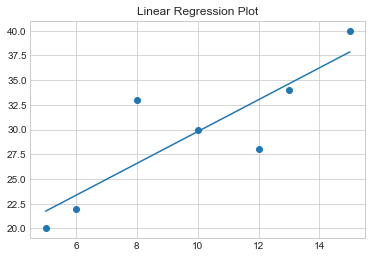

In [4]:
import matplotlib.pyplot as plt

def visualise_lr(points):
    """Function to visualise output of linear regression function linear_regression()
    Where input is a set of 2D points"""
    
    plt.style.use('seaborn-whitegrid') # Creating a basic plot area
    fig = plt.figure()
    ax = plt.axes()
    plt.title("Linear Regression Plot")
    
    # Separating the x and y coordinates in order to plot the scatter
    c,d = zip(*points)

    # Defining the x axis (tactile based on input provided?)
    min_x = min(c)
    max_x = max(c)
    x = np.linspace(min_x, max_x)

    # Plot scatter
    ax.scatter(c,d)

    # Calculate alpha and beta using linear regression function
    (alpha, beta) = linear_regression(points)
    
    # Plot linear regression line
    ax.plot(x, alpha*x+beta)
    
    #print("(alpha, beta): "+str(linear_regression(points)))
    return ax


visualise_lr(dataset)


## Adding ability to import text files:

In [5]:
def linear_regression_tool_text(filename):
    """
    Read the (2D) coordinates contained in `filename`(.txt),
    assuming they are separated by a comma, supplied on individual lines, and the file is saved in the local directory
    """
    
    # Open file and write data to a list of lists of length 2
    with open(filename) as f:
        list_of_lines = [line.rstrip().split(',') for line in f.readlines()]
        list_of_points = [[int(point[0]),int(point[1])] for point in list_of_lines]
        
    # Apply the visualise_lr function defined above to the list
    visualise_lr(list_of_points)

linear_regression_tool_text("dataset_example.txt")

FileNotFoundError: [Errno 2] No such file or directory: 'dataset_example.txt'

Text file import without linear regression...

In [ ]:
def coordinate_text_import(filename):
    """
    Read the (2D) coordinates contained in `filename`(.txt),
    assuming they are separated by a comma, supplied on individual lines, and the file is saved in the local directory
    """
    
    # Open file and write data to a list of lists of length 2
    with open(filename) as f:
        list_of_lines = [line.rstrip().split(',') for line in f.readlines()]
        list_of_points = [[int(point[0]),int(point[1])] for point in list_of_lines]
    return list_of_points    
    

Creating random text file to import: (not sure if there is a better way of doing this?)

In [ ]:
def create_random_2D_coordinates(file_name = "random_coordinates", number_of_coordinates = 10, min_value = -10, max_value = 10):
    
    coordinates = [list(np.random.randint(min_value, max_value,2)) for i in range(number_of_coordinates)]
    string_coordinates = [str(e[0])+', '+str(e[1])+'\n' for e in coordinates]

    with open(file_name,'w') as coord_file:
        for coord in string_coordinates:
            coord_file.writelines(coord)
            
create_random_2D_coordinates()

Applying visualisation function to random coordinates:

In [ ]:
#linear_regression_tool_text("random_coordinates")
#or
visualise_lr(coordinate_text_import("random_coordinates"))


## Lab 5: Testing

In [ ]:
import statistics as stats

def unit_testing_lr():
    assert check_input([[0,1],[1,0],[0,0]])==None, 'Expected input passes'
    assert check_input([[1,1]])=='Not enough data provided, please provide at least 2 points', 'Less than 2 points given'
    assert check_input([1,2,3,4])=='Please provide points as lists', 'Points not given as lists'
    assert check_input([[1,2,3],[4,5,6]])=='Please provide 2D points', 'Points not given in 2 dimensions'
    assert calculate_mean((0,0),(0,0))== (0,0), 'Zero'
    assert calculate_mean((1,1),(2,2))== (1,2), 'Positive'
    assert calculate_mean((-1,-1),(-2,-2))== (-1,-2), 'Mixture'
    assert not calculate_mean((1,2,3),(4,5,6))==1, 'Nonsense'
    assert calculate_covariance((0,0),(0,0),0,0)==np.cov([[0,0],[0,0]]).all(), 'Zero'
#     assert calculate_covariance()==np.cov(), 'Positive'
#     assert calculate_covariance()==np.cov(), 'Mixture'
#     assert calculate_covariance()==np.cov(), 'Nonsense'
    assert calculate_variance((1,2,3,4),stats.mean([1,2,3,4]))==(stats.pvariance([1,2,3,4]))*4, 'General example'
    assert calculate_variance([1],stats.mean([1]))==(stats.pvariance([1])), 'unit'
    assert calculate_variance([-1,-2,-3],stats.mean([-1,-2,-3]))==(stats.pvariance([-1,-2,-3]))*3, 'Mixture'



unit_testing_lr()

 Integration test

In [ ]:
def integration_test():
    assert linear_regression(coordinate_text_import("dataset_example.txt"))==(-0.25,7.5)
    
integration_test()